In [1]:
# import FLAT_RCL.txt from url into df

import pandas as pd
import numpy as np
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

url = urlopen("https://www-odi.nhtsa.dot.gov/downloads/folders/Recalls/FLAT_RCL.zip")
file = 'FLAT_RCL.txt'

#Download Zipfile and create pandas DataFrame
zipfile = ZipFile(BytesIO(url.read()))
df = pd.read_csv(zipfile.open(file), 
                     header = None,
                     encoding = 'ANSI',
                     sep='\t',
                     names = ['record_id',
                                'campno',
                                'maketxt',
                                'modeltxt',
                                'yeartxt',
                                'mfgcampno',
                                'compname',
                                'mfgname',
                                'bgman',
                                'endman',
                                'rcltypecd',
                                'potaff',
                                'odate',
                                'influenced_by',
                                'mfgtxt',
                                'rcdate',
                                'datea',
                                'rpno',
                                'fmvss',
                                'desc_defect',
                                'conequence_defect',
                                'corrective_action',
                                'notes',
                                'rcl_cmpt_id',
                                'mfr_comp_name',
                                'mfr_comp_desc',
                                'mfr_comp_ptno'])

In [2]:
makes = ['BMW', 'MINI', 'MERCEDES', 'LEXUS', 'NISSAN', 'AUDI', 'VOLKSWAGEN', 'HYUNDAI', 'INFINITI', 'KIA', 'MAZDA', 'LAND ROVER', 'VOLVO', 'HONDA', 'JAGUAR', 'ACURA', 'TOYOTA', 'MOPAR', 'SUBARU', 'PORSCHE']

In [41]:
df.maketxt.isin(makes)
df_filtered_make = df[df.maketxt.isin(makes)]
df_filtered_make.shape

(21458, 27)

In [42]:
df_filtered_make.maketxt.unique().tolist()

['HONDA',
 'VOLKSWAGEN',
 'VOLVO',
 'ACURA',
 'SUBARU',
 'NISSAN',
 'KIA',
 'INFINITI',
 'TOYOTA',
 'HYUNDAI',
 'MINI',
 'BMW',
 'MAZDA',
 'LEXUS',
 'LAND ROVER',
 'AUDI',
 'JAGUAR',
 'PORSCHE',
 'MOPAR',
 'MERCEDES']

In [43]:
df_filtered_make.groupby('maketxt', as_index= False)['maketxt'].agg({'count':'count'})

,maketxt,count
0,ACURA,646
1,AUDI,935
2,BMW,3498
3,HONDA,3420
4,HYUNDAI,668
5,INFINITI,408
6,JAGUAR,414
7,KIA,389
8,LAND ROVER,381
9,LEXUS,726


In [44]:
df_filtered_make = df_filtered_make.drop_duplicates()

In [45]:
df_filtered_make.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 48 to 154390
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   record_id          21458 non-null  int64  
 1   campno             21458 non-null  object 
 2   maketxt            21458 non-null  object 
 3   modeltxt           21458 non-null  object 
 4   yeartxt            21458 non-null  int64  
 5   mfgcampno          10462 non-null  object 
 6   compname           21458 non-null  object 
 7   mfgname            21458 non-null  object 
 8   bgman              14471 non-null  float64
 9   endman             14523 non-null  float64
 10  rcltypecd          21458 non-null  object 
 11  potaff             21457 non-null  float64
 12  odate              19457 non-null  float64
 13  influenced_by      21458 non-null  object 
 14  mfgtxt             21458 non-null  object 
 15  rcdate             21456 non-null  float64
 16  datea              2

In [46]:
df_filtered_make.rename(columns={'record_id':'RecordID','campno':'CampaignNumber','maketxt':'VehicleMake','modeltxt':'VehicleModel','yeartxt':'VehicleYear','mfgcampno':'MfgCampaignNumber','compname':'ComponentName','mfgname':'MfgFiledReport','bgman':'MfgBeginDate','endman':'MfgEndDate','rcltypecd':'RecallTypeCode','potaff':'PotentialUnitsAffected','odate':'OwnerNotifiedDate','influenced_by':'RecallInitiator','mfgtxt':'MfgOfRecalledProducts','rcdate':'ReportReceivedDate','datea':'RecordCreationDate','rpno':'RegulationPartNumber','fmvss':'FMVSafetyStandardNumber','desc_defect':'DefectSummary','conequence_defect':'ConsequenceSummary','corrective_action':'CorrectiveSummary','notes':'RecallNotes','rcl_cmpt_id':'RecallComponentID'}, inplace=True)

In [47]:
df_filtered_make.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21458 entries, 48 to 154390
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 21458 non-null  int64  
 1   CampaignNumber           21458 non-null  object 
 2   VehicleMake              21458 non-null  object 
 3   VehicleModel             21458 non-null  object 
 4   VehicleYear              21458 non-null  int64  
 5   MfgCampaignNumber        10462 non-null  object 
 6   ComponentName            21458 non-null  object 
 7   MfgFiledReport           21458 non-null  object 
 8   MfgBeginDate             14471 non-null  float64
 9   MfgEndDate               14523 non-null  float64
 10  RecallTypeCode           21458 non-null  object 
 11  PotentialUnitsAffected   21457 non-null  float64
 12  OwnerNotifiedDate        19457 non-null  float64
 13  RecallInitiator          21458 non-null  object 
 14  MfgOfRecalledProduct

In [48]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(df_filtered_make, title='Pandas Profiling Report')
profile.to_widgets()

Render widgets: 100%|██████████| 1/1 [00:13<00:00, 13.11s/it]

In [49]:
profile.to_file("data_profile_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 38.46it/s]


array([[<AxesSubplot:title={'center':'RecordID'}>,
        <AxesSubplot:title={'center':'VehicleYear'}>,
        <AxesSubplot:title={'center':'MfgBeginDate'}>],
       [<AxesSubplot:title={'center':'MfgEndDate'}>,
        <AxesSubplot:title={'center':'PotentialUnitsAffected'}>,
        <AxesSubplot:title={'center':'OwnerNotifiedDate'}>],
       [<AxesSubplot:title={'center':'ReportReceivedDate'}>,
        <AxesSubplot:title={'center':'RecordCreationDate'}>,
        <AxesSubplot:>]], dtype=object)

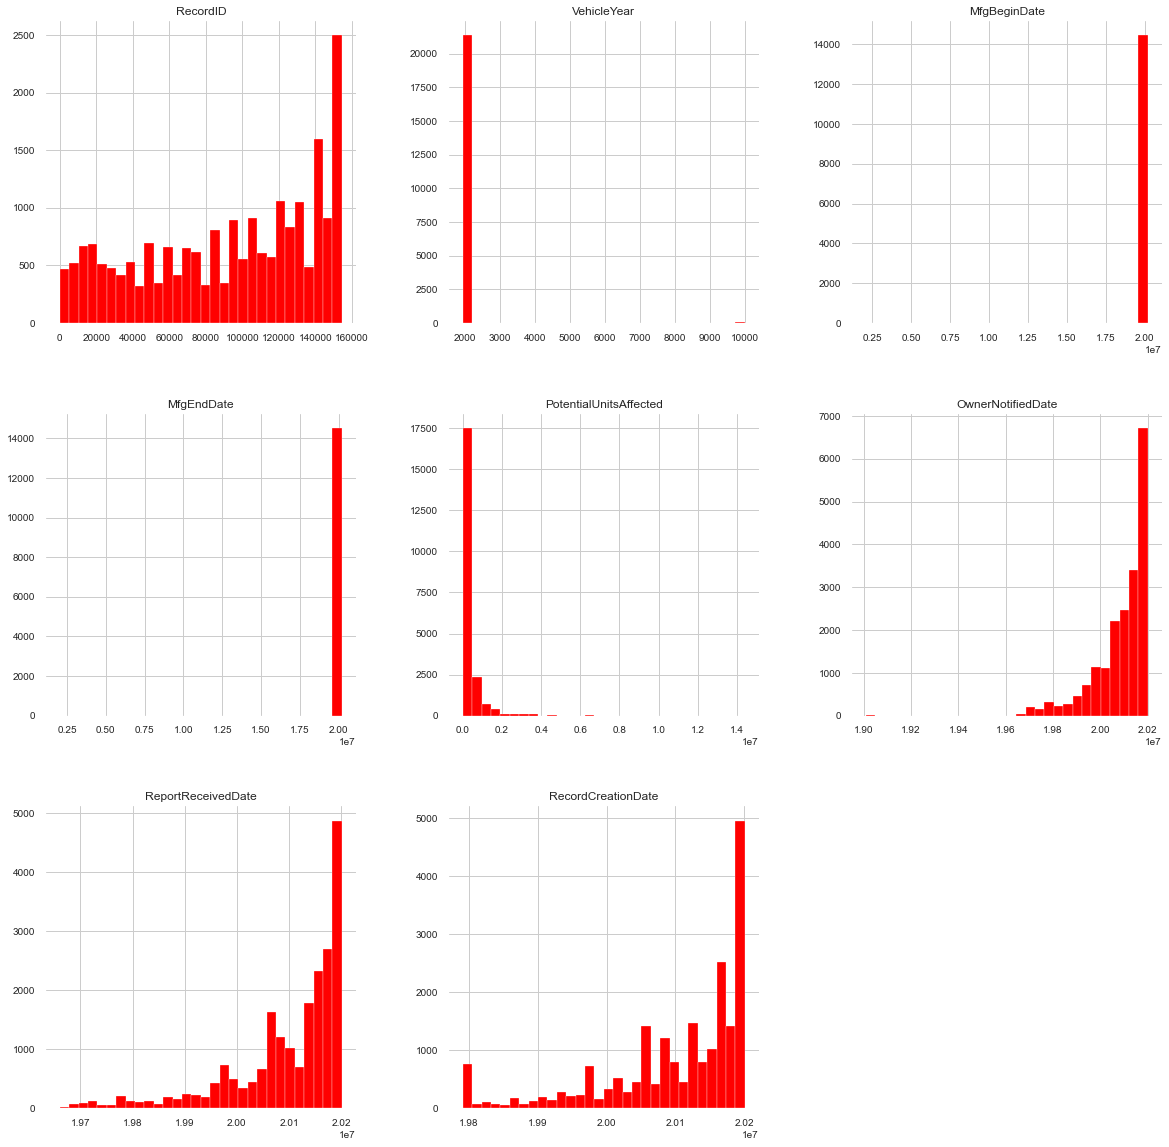

In [50]:
df_filtered_make.hist(bins = 30, figsize = (20,20), color = 'r')

In [54]:
count = 1
df_filtered_make['Count'] = count

In [73]:
df_filtered_make['RecallYear'] = df_filtered_make['ReportReceivedDate'].astype(str).str[0:4]
df_filtered_make['RecallYear'].replace('nan', np.nan).astype(float)
df_filtered_make['RecallYear'].fillna(0)
df_filtered_make['RecallYear'] = pd.to_numeric(df_filtered_make['RecallYear'], errors='coerce')

In [78]:
df_filtered_make['RecallMonth'] = df_filtered_make['ReportReceivedDate'].astype(str).str[4:6]

In [79]:
df_filtered_make.head()

,RecordID,CampaignNumber,VehicleMake,VehicleModel,VehicleYear,MfgCampaignNumber,ComponentName,MfgFiledReport,MfgBeginDate,MfgEndDate,...,CorrectiveSummary,RecallNotes,RecallComponentID,mfr_comp_name,mfr_comp_desc,mfr_comp_ptno,Count,RecallYear,YearsBetweenRecallandVehicle,RecallMonth
48,49,02V250000,HONDA,FSC600,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,"DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106390000000309,NaN,NaN,NaN,1,2002.0,0.0,09
49,50,02V250000,HONDA,SILVER WING,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,"DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106389000000309,NaN,NaN,NaN,1,2002.0,0.0,09
67,68,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004.0,20060128.0,...,OWNERS WILL BE PROVIDED WITH A NEW TIRE INFORM...,VOLKSWAGEN RECALL NO. M8.CUSTOMERS MAY ALSO CO...,000022568000222738000000349,NaN,NaN,NaN,1,2006.0,0.0,02
97,98,02V037005,VOLVO,WX,2000,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106287000000020,NaN,NaN,NaN,1,2002.0,2.0,08
98,99,02V037005,VOLVO,WX,1999,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106286000000020,NaN,NaN,NaN,1,2002.0,3.0,08


In [85]:
df_filtered_make.describe()

,RecordID,VehicleYear,MfgBeginDate,MfgEndDate,PotentialUnitsAffected,OwnerNotifiedDate,ReportReceivedDate,RecordCreationDate,Count,RecallYear,YearsBetweenRecallandVehicle
count,21458.000000,21458.000000,1.447100e+04,1.452300e+04,2.145700e+04,1.945700e+04,2.145600e+04,2.145800e+04,21458.0,21456.000000,21456.000000
mean,92458.347097,2046.899758,2.003047e+07,2.005991e+07,2.825207e+05,2.009267e+07,2.009807e+07,2.009976e+07,1.0,2009.744407,-37.160235
std,47169.872973,573.544166,2.024715e+05,1.825788e+05,6.728349e+05,1.117382e+05,1.107034e+05,1.055393e+05,0.0,11.073556,574.161230
min,49.000000,1949.000000,2.090211e+06,2.040211e+06,0.000000e+00,1.901010e+07,1.966093e+07,1.979101e+07,1.0,1966.000000,-8033.000000
25%,51773.250000,2000.000000,1.999033e+07,2.001083e+07,4.800000e+03,2.005093e+07,2.006032e+07,2.006032e+07,1.0,2006.000000,0.000000
50%,101449.500000,2008.000000,2.005120e+07,2.009073e+07,5.146500e+04,2.013042e+07,2.013121e+07,2.013122e+07,1.0,2013.000000,3.000000
75%,135897.500000,2014.000000,2.011031e+07,2.014023e+07,2.951360e+05,2.018021e+07,2.018085e+07,2.018083e+07,1.0,2018.000000,7.000000
max,154391.000000,9999.000000,2.020093e+07,2.020031e+07,1.440000e+07,2.020073e+07,2.020073e+07,2.020073e+07,1.0,2020.000000,32.000000


<AxesSubplot:xlabel='RecallYear', ylabel='RecallMonth'>

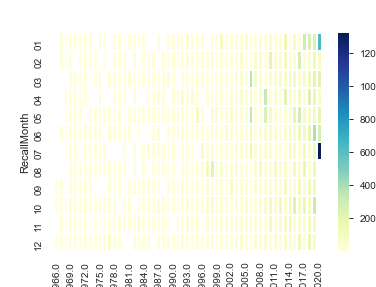

In [84]:
df_season_pivot = df_filtered_make.pivot_table(values='Count',index=['RecallMonth'],columns=['RecallYear'],aggfunc=np.sum)

import seaborn as sns 
%matplotlib inline
sns.heatmap(df_season_pivot,cmap='YlGnBu',linecolor='white',linewidths=1)

In [86]:
df_filtered_make['YearsBetweenRecallandVehicle'] = df_filtered_make['RecallYear'] - df_filtered_make['VehicleYear']
df_filtered_make.head()

,RecordID,CampaignNumber,VehicleMake,VehicleModel,VehicleYear,MfgCampaignNumber,ComponentName,MfgFiledReport,MfgBeginDate,MfgEndDate,...,CorrectiveSummary,RecallNotes,RecallComponentID,mfr_comp_name,mfr_comp_desc,mfr_comp_ptno,Count,RecallYear,YearsBetweenRecallandVehicle,RecallMonth
48,49,02V250000,HONDA,FSC600,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,"DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106390000000309,NaN,NaN,NaN,1,2002.0,0.0,09
49,50,02V250000,HONDA,SILVER WING,2002,NaN,WHEELS,AMERICAN HONDA MOTOR CO.,20010808.0,20020708.0,...,"DEALERS WILL REPLACE THE REAR WHEEL, INCLUDING...","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015234000106389000000309,NaN,NaN,NaN,1,2002.0,0.0,09
67,68,06V043000,VOLKSWAGEN,BEETLE,2006,M8,EQUIPMENT:OTHER:LABELS,"VOLKSWAGEN OF AMERICA, INC",20051004.0,20060128.0,...,OWNERS WILL BE PROVIDED WITH A NEW TIRE INFORM...,VOLKSWAGEN RECALL NO. M8.CUSTOMERS MAY ALSO CO...,000022568000222738000000349,NaN,NaN,NaN,1,2006.0,0.0,02
97,98,02V037005,VOLVO,WX,2000,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106287000000020,NaN,NaN,NaN,1,2002.0,2.0,08
98,99,02V037005,VOLVO,WX,1999,NaN,STEERING:LINKAGES:TIE ROD ASSEMBLY,VOLVO TRUCKS NORTH AMERICA INC,19990614.0,20000831.0,...,DEALERS WILL REPLACE THE BALL SOCKET ASSEMBLIE...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015117000106286000000020,NaN,NaN,NaN,1,2002.0,3.0,08


In [98]:
df_make_summary = df_filtered_make.groupby(['VehicleMake','RecallTypeCode']).agg({'CampaignNumber':pd.Series.nunique, 'PotentialUnitsAffected':'sum'})
df_make_summary_pivot = pd.pivot_table(df_make_summary, values=['CampaignNumber', 'PotentialUnitsAffected'], index = ['VehicleMake'], columns=['RecallTypeCode'])
df_make_summary_pivot.head(20)

CampaignNumber                        PotentialUnitsAffected  \
RecallTypeCode              C     E    I    T      V                      C   
VehicleMake                                                                   
ACURA                     NaN  19.0  NaN  NaN   96.0                    NaN   
AUDI                      NaN   5.0  NaN  NaN  166.0                    NaN   
BMW                       NaN  19.0  NaN  NaN  395.0                    NaN   
HONDA                     NaN  32.0  2.0  NaN  333.0                    NaN   
HYUNDAI                   NaN   7.0  NaN  NaN  185.0                    NaN   
INFINITI                  NaN   6.0  1.0  NaN   84.0                    NaN   
JAGUAR                    NaN   3.0  NaN  NaN  118.0                    NaN   
KIA                       NaN   3.0  NaN  NaN  103.0                    NaN   
LAND ROVER                NaN   4.0  NaN  NaN  106.0                    NaN   
LEXUS                     NaN   8.0  NaN  NaN   88.0                    NaN   
MAZDA                     NaN  18.0  1.0  1.0  184.0                    NaN   
MERCEDES                  NaN   1.0  NaN  NaN    NaN                    NaN   
MINI                      NaN   3.0  NaN  NaN   32.0                    NaN   
MOPAR                     NaN  11.0  NaN  NaN    NaN                    NaN   
NISSAN                    NaN  20.0  2.0  NaN  293.0                    NaN   
PORSCHE                   NaN   7.0  NaN  NaN  146.0                    NaN   
SUBARU                    NaN   9.0  1.0  NaN  140.0                    NaN   
TOYOTA                    NaN  28.0  NaN  NaN  321.0                    NaN   
VOLKSWAGEN                NaN  11.0  NaN  NaN  284.0                    NaN   
VOLVO                     1.0   5.0  NaN  NaN  327.0                  800.0   

                                                                  
RecallTypeCode           E          I            T             V  
VehicleMake                                                       
ACURA            5587144.0        NaN          NaN  3.727907e+08  
AUDI              718138.0        NaN          NaN  9.124663e+07  
BMW              9478720.0        NaN          NaN  4.558231e+08  
HONDA           23531010.0   105868.0          NaN  1.809417e+09  
HYUNDAI           159574.0        NaN          NaN  2.555961e+08  
INFINITI          481809.0  2059947.0          NaN  1.429941e+08  
JAGUAR           5619700.0        NaN          NaN  4.214759e+06  
KIA               301244.0        NaN          NaN  1.032896e+08  
LAND ROVER       1899867.0        NaN          NaN  7.011869e+06  
LEXUS            1827267.0        NaN          NaN  4.116906e+08  
MAZDA            3274403.0    95302.0  158400000.0  1.205467e+08  
MERCEDES          146430.0        NaN          NaN           NaN  
MINI              178840.0        NaN          NaN  6.717364e+06  
MOPAR             355819.0        NaN          NaN           NaN  
NISSAN           9017933.0  8356288.0          NaN  4.110752e+08  
PORSCHE           504021.0        NaN          NaN  1.383428e+07  
SUBARU           2266818.0   670560.0          NaN  2.058415e+08  
TOYOTA          11740091.0        NaN          NaN  9.618665e+08  
VOLKSWAGEN       2212024.0        NaN          NaN  3.325201e+08  
VOLVO             360554.0        NaN          NaN  1.062190e+08

In [99]:
df_make_summary_pivot.columns = df_make_summary_pivot.columns.map('_'.join)
df_make_summary_pivot.reset_index(inplace = True)
df_make_summary_pivot.head(20)

,VehicleMake,CampaignNumber_C,CampaignNumber_E,CampaignNumber_I,CampaignNumber_T,CampaignNumber_V,PotentialUnitsAffected_C,PotentialUnitsAffected_E,PotentialUnitsAffected_I,PotentialUnitsAffected_T,PotentialUnitsAffected_V
0,ACURA,NaN,19.0,NaN,NaN,96.0,NaN,5587144.0,NaN,NaN,3.727907e+08
1,AUDI,NaN,5.0,NaN,NaN,166.0,NaN,718138.0,NaN,NaN,9.124663e+07
2,BMW,NaN,19.0,NaN,NaN,395.0,NaN,9478720.0,NaN,NaN,4.558231e+08
3,HONDA,NaN,32.0,2.0,NaN,333.0,NaN,23531010.0,105868.0,NaN,1.809417e+09
4,HYUNDAI,NaN,7.0,NaN,NaN,185.0,NaN,159574.0,NaN,NaN,2.555961e+08
5,INFINITI,NaN,6.0,1.0,NaN,84.0,NaN,481809.0,2059947.0,NaN,1.429941e+08
6,JAGUAR,NaN,3.0,NaN,NaN,118.0,NaN,5619700.0,NaN,NaN,4.214759e+06
7,KIA,NaN,3.0,NaN,NaN,103.0,NaN,301244.0,NaN,NaN,1.032896e+08
8,LAND ROVER,NaN,4.0,NaN,NaN,106.0,NaN,1899867.0,NaN,NaN,7.011869e+06
9,LEXUS,NaN,8.0,NaN,NaN,88.0,NaN,1827267.0,NaN,NaN,4.116906e+08


In [122]:
df_make_summary_pivot.fillna(0, inplace=True)

df_make_summary_pivot['TotalNumberOfCampaigns'] = (df_make_summary_pivot['CampaignNumber_C'] + df_make_summary_pivot['CampaignNumber_E'] + df_make_summary_pivot['CampaignNumber_I'] + df_make_summary_pivot['CampaignNumber_T'] + df_make_summary_pivot['CampaignNumber_V'])

df_make_summary_pivot['TotalNumberOfUnitsAffected'] = (df_make_summary_pivot['PotentialUnitsAffected_C'] + df_make_summary_pivot['PotentialUnitsAffected_E'] + df_make_summary_pivot['PotentialUnitsAffected_I'] + df_make_summary_pivot['PotentialUnitsAffected_T'] + df_make_summary_pivot['PotentialUnitsAffected_V'])

df_make_summary_pivot['AvgUnitsPerCampaign'] = df_make_summary_pivot['TotalNumberOfUnitsAffected'] / df_make_summary_pivot['TotalNumberOfCampaigns']

#df_make_summary_pivot = df_make_summary_pivot.drop('AvgVehiclesPerCampaign', axis=1, inplace = True)

df_make_summary_pivot.head(20)

,VehicleMake,CampaignNumber_C,CampaignNumber_E,CampaignNumber_I,CampaignNumber_T,CampaignNumber_V,PotentialUnitsAffected_C,PotentialUnitsAffected_E,PotentialUnitsAffected_I,PotentialUnitsAffected_T,PotentialUnitsAffected_V,TotalNumberOfCampaigns,TotalNumberOfUnitsAffected,AvgUnitsPerCampaign
0,ACURA,0.0,19.0,0.0,0.0,96.0,0.0,5587144.0,0.0,0.0,3.727907e+08,115.0,3.783778e+08,3.290242e+06
1,AUDI,0.0,5.0,0.0,0.0,166.0,0.0,718138.0,0.0,0.0,9.124663e+07,171.0,9.196476e+07,5.378056e+05
2,BMW,0.0,19.0,0.0,0.0,395.0,0.0,9478720.0,0.0,0.0,4.558231e+08,414.0,4.653018e+08,1.123917e+06
3,HONDA,0.0,32.0,2.0,0.0,333.0,0.0,23531010.0,105868.0,0.0,1.809417e+09,367.0,1.833054e+09,4.994698e+06
4,HYUNDAI,0.0,7.0,0.0,0.0,185.0,0.0,159574.0,0.0,0.0,2.555961e+08,192.0,2.557556e+08,1.332061e+06
5,INFINITI,0.0,6.0,1.0,0.0,84.0,0.0,481809.0,2059947.0,0.0,1.429941e+08,91.0,1.455359e+08,1.599295e+06
6,JAGUAR,0.0,3.0,0.0,0.0,118.0,0.0,5619700.0,0.0,0.0,4.214759e+06,121.0,9.834459e+06,8.127652e+04
7,KIA,0.0,3.0,0.0,0.0,103.0,0.0,301244.0,0.0,0.0,1.032896e+08,106.0,1.035908e+08,9.772721e+05
8,LAND ROVER,0.0,4.0,0.0,0.0,106.0,0.0,1899867.0,0.0,0.0,7.011869e+06,110.0,8.911736e+06,8.101578e+04
9,LEXUS,0.0,8.0,0.0,0.0,88.0,0.0,1827267.0,0.0,0.0,4.116906e+08,96.0,4.135179e+08,4.307478e+06


[Text(0, 0, 'ACURA'),
 Text(1, 0, 'AUDI'),
 Text(2, 0, 'BMW'),
 Text(3, 0, 'HONDA'),
 Text(4, 0, 'HYUNDAI'),
 Text(5, 0, 'INFINITI'),
 Text(6, 0, 'JAGUAR'),
 Text(7, 0, 'KIA'),
 Text(8, 0, 'LAND ROVER'),
 Text(9, 0, 'LEXUS'),
 Text(10, 0, 'MAZDA'),
 Text(11, 0, 'MERCEDES'),
 Text(12, 0, 'MINI'),
 Text(13, 0, 'MOPAR'),
 Text(14, 0, 'NISSAN'),
 Text(15, 0, 'PORSCHE'),
 Text(16, 0, 'SUBARU'),
 Text(17, 0, 'TOYOTA'),
 Text(18, 0, 'VOLKSWAGEN'),
 Text(19, 0, 'VOLVO')]

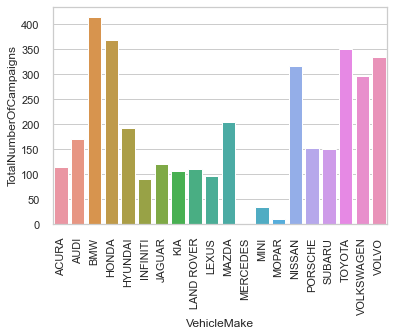

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x='VehicleMake', y='TotalNumberOfCampaigns', data=df_make_summary_pivot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'ACURA'),
 Text(1, 0, 'AUDI'),
 Text(2, 0, 'BMW'),
 Text(3, 0, 'HONDA'),
 Text(4, 0, 'HYUNDAI'),
 Text(5, 0, 'INFINITI'),
 Text(6, 0, 'JAGUAR'),
 Text(7, 0, 'KIA'),
 Text(8, 0, 'LAND ROVER'),
 Text(9, 0, 'LEXUS'),
 Text(10, 0, 'MAZDA'),
 Text(11, 0, 'MERCEDES'),
 Text(12, 0, 'MINI'),
 Text(13, 0, 'MOPAR'),
 Text(14, 0, 'NISSAN'),
 Text(15, 0, 'PORSCHE'),
 Text(16, 0, 'SUBARU'),
 Text(17, 0, 'TOYOTA'),
 Text(18, 0, 'VOLKSWAGEN'),
 Text(19, 0, 'VOLVO')]

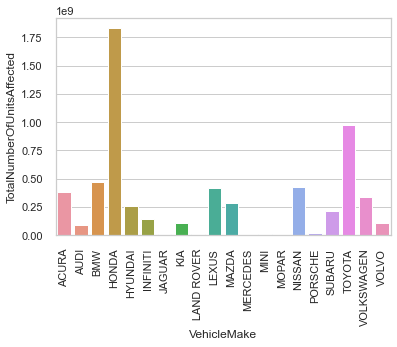

In [115]:
axz = sns.barplot(x='VehicleMake', y='TotalNumberOfUnitsAffected', data=df_make_summary_pivot)
axz.set_xticklabels(axz.get_xticklabels(), rotation=90)